In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro
from bioinfokit.analys import get_data, stat
import scipy.stats as st
from scipy.stats import anderson
from scipy.stats import kstest
import pylab 
from scipy.stats import mannwhitneyu
import pingouin as pg
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import chi2_contingency 
from scipy.stats import levene
import scipy.stats as stats

In [2]:
df = pd.read_csv (r'/Users\Pc\Desktop\MATH MODEL 1.1\SIMH\CRMAX.csv',sep=";")   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
df.tail()

,TRM01,TRM02,TRM03,TRM04,TRM05,TRM06,TRM07,TRM08,TRM09,TRM10,...,TRM21,TRM22,TRM23,TRM24,TRM25,TRM26,TRM27,TRM28,TRM29,TRM30
295,1057,997,1016,976,902,1344,1413,1372,1408,1428,...,1665,1579,1648,1589,1591,1884,1910,1953,1889,1953
296,1010,1030,934,996,954,1321,1320,1333,1452,1449,...,1673,1630,1629,1624,1618,1831,1934,1915,1827,2000
297,1086,1066,941,987,931,1368,1309,1382,1437,1444,...,1642,1625,1692,1602,1603,1950,1982,1927,1887,1966
298,1000,1064,969,1008,933,1410,1330,1426,1437,1401,...,1682,1621,1649,1607,1589,1918,1891,1924,1851,1949
299,1030,1082,1003,996,932,1356,1333,1391,1449,1459,...,1715,1649,1645,1622,1614,1912,1942,1918,1888,2003


In [3]:
dfDeterministics = pd.read_csv (r'/Users\Pc\Desktop\MATH MODEL 1.1\SIMH\DatosDeterministicos2.csv',sep=";")   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
dfDeterministics.columns = ['Instance', 'CRMAX']
dfDeterministics.head()

,Instance,CRMAX
0,TRM01,1085
1,TRM02,1140
2,TRM03,1014
3,TRM04,1054
4,TRM05,981


In [4]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'])
df_melt.columns = ['index', 'Instance', 'CRMAX']
df_melt.tail()

,index,Instance,CRMAX
8995,295,TRM30,1953
8996,296,TRM30,2000
8997,297,TRM30,1966
8998,298,TRM30,1949
8999,299,TRM30,2003


In [5]:
def CalcularNormalidadFamily(instance, name_instance):
    mean=instance.CRMAX.mean() 
    res=instance.CRMAX - mean
    w, p= shapiro(instance.CRMAX)
    Message =""
    Retorno= True
    if(p>0.05):
        Message= "Residuals are normally distributed"
    else:
        Message= "Residuals are not normally distributed"
        Retorno=False
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals in Family ' + name_instance )
    sns.distplot(res)
    plt.show()   
    st.probplot(instance["CRMAX"], dist="norm", plot=pylab)
    pylab.show()
    return (p,Message, Retorno)

# Family 1

In [6]:
Family_1 = df_melt[df_melt.Instance.isin(['TRM01','TRM02', 'TRM03', 'TRM04','TRM05'])]
Family_1=Family_1.assign(Family=1)
Family_1C= Family_1.copy()
del Family_1C['index']
del Family_1C['Instance']
del Family_1C['Family']
Family_1C=Family_1C.assign(Type='Stochastic')
Family_1D=dfDeterministics[dfDeterministics.Instance.isin(['TRM01','TRM02', 'TRM03', 'TRM04','TRM05'])]
del Family_1D['Instance']
Family_1D=Family_1D.assign(Type='Deterministics')
Family_1C=pd.concat([Family_1C, Family_1D])

In [7]:
dfDeterministics

,Instance,CRMAX
0,TRM01,1085
1,TRM02,1140
2,TRM03,1014
3,TRM04,1054
4,TRM05,981
...,...,...
145,TRM26,1883
146,TRM27,1912
147,TRM28,1905
148,TRM29,1889


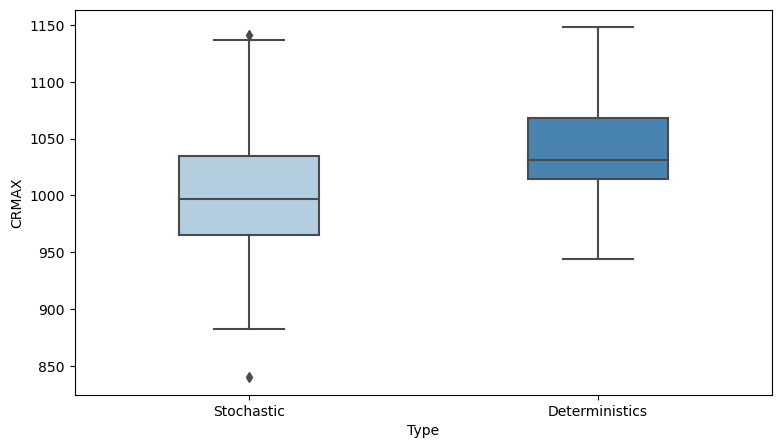

In [8]:
plt.figure(figsize=(9,5))
ax=sns.boxplot(x="Type", y="CRMAX", data=Family_1C, width=0.4,palette="Blues")

parameters = {'axes.labelsize': 10,
          'axes.titlesize': 15}
plt.rcParams.update(parameters)
plt.savefig("BoxPlot2.pdf",dpi=2000)

Normalidad

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


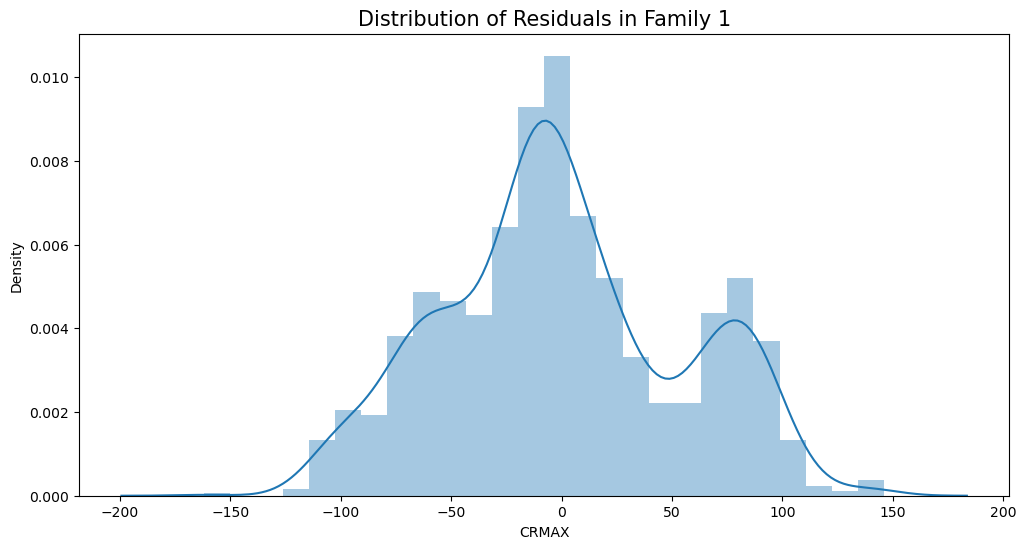

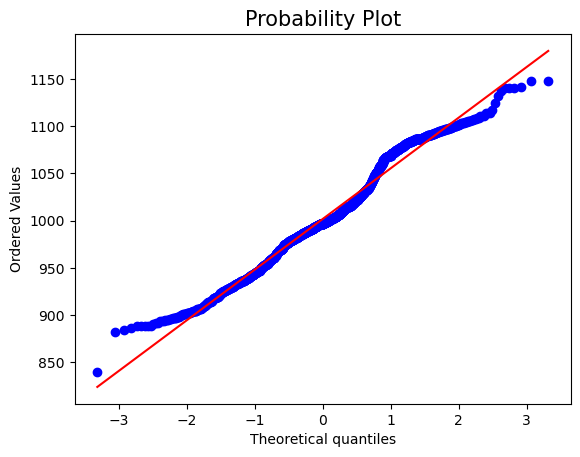

(4.310797053520832e-13, 'Residuals are not normally distributed', False)

In [9]:
CalcularNormalidadFamily(Family_1C,str(1))

Independencia

In [10]:
stat, p, dof, expected = chi2_contingency(Family_1C.CRMAX) 
alpha = 0.05
Message=''
if p <= alpha: 
    Message= 'Dependent(reject H0)'
else: 
    Message= 'Independent(H0 holds true)'
print(p,Message)

1.0 Independent(H0 holds true)


Homocedasticidad

In [11]:
stat, p=levene(Family_1.CRMAX, Family_1D.CRMAX)
alpha = 0.05
print(p)
Message=''
if p <= alpha: 
    Message= 'No Homocedasticos'
else: 
    Message= 'Homocedasticos'
print(Message)

0.6263453241301623
Homocedasticos


Prueba Mann-Whitney

In [12]:
stat, p = mannwhitneyu(Family_1.CRMAX, Family_1D.CRMAX,alternative='two-sided')
print(p)
# interpretación
alpha = 0.05
if p > alpha:
	print('No rechazamos H0: No hay diferencias significativas')
else:
	print('Rechazamos H0: Hay diferencias significativas')

0.00039273634156571313
Rechazamos H0: Hay diferencias significativas


Prueba t

In [13]:
v,p=stats.ttest_ind(Family_1.CRMAX,Family_1D.CRMAX, equal_var = True)
# interpretación
print(p)
alpha = 0.05
if p > alpha:
	print('No rechazamos H0: No hay diferencias significativas')
else:
	print('Rechazamos H0: Hay diferencias significativas')


3.411189860872642e-05
Rechazamos H0: Hay diferencias significativas


Box plot per instance

C:\Users\PC\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


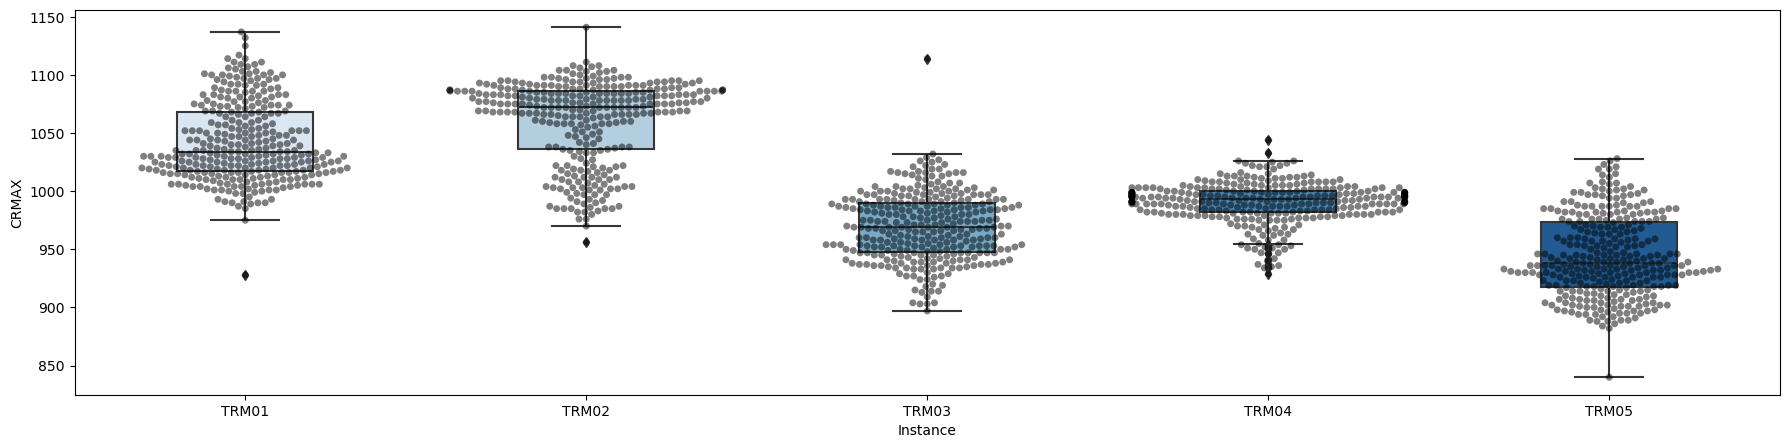

In [14]:
plt.figure(figsize=(22,5))
ax=sns.boxplot(x="Instance", y="CRMAX", data=Family_1, width=0.4,palette="Blues")

sns.swarmplot(x="Instance", y="CRMAX", data=Family_1,  color='black',
              alpha = 0.5, ax=ax)

parameters = {'axes.labelsize': 16,
          'axes.titlesize': 35}
plt.rcParams.update(parameters)

plt.savefig("Family1.pdf",dpi=2000)

# Family 2


In [15]:
V=['TRM06','TRM07', 'TRM08', 'TRM09','TRM10']
Family_2 = df_melt[df_melt.Instance.isin(V)]
Family_2=Family_2.assign(Family=2)
Family_2C= Family_2.copy()
del Family_2C['index']
del Family_2C['Instance']
del Family_2C['Family']
Family_2C=Family_2C.assign(Type='Stochastic')
Family_2D=dfDeterministics[dfDeterministics.Instance.isin(V)]
del Family_2D['Instance']
Family_2D=Family_2D.assign(Type='Deterministics')
Family_2C=pd.concat([Family_2C, Family_2D])

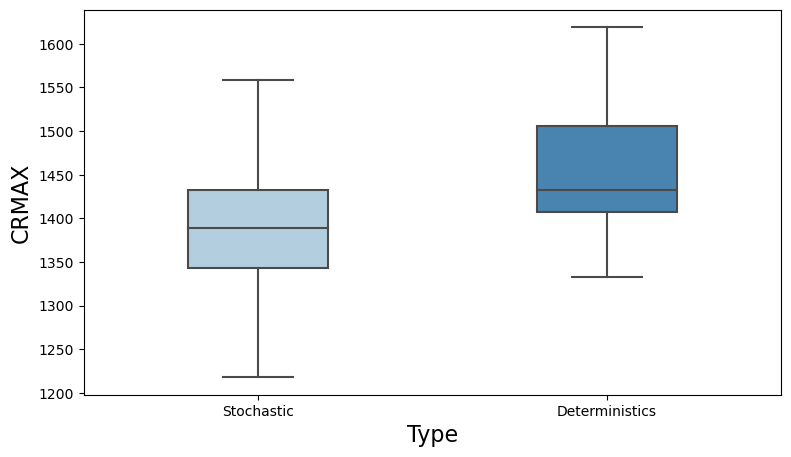

In [16]:
plt.figure(figsize=(9,5))
ax=sns.boxplot(x="Type", y="CRMAX", data=Family_2C, width=0.4,palette="Blues")



parameters = {'axes.labelsize': 16,
          'axes.titlesize': 35}
plt.rcParams.update(parameters)
plt.savefig("BoxPlot2.pdf",dpi=2000)

Normalidad

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


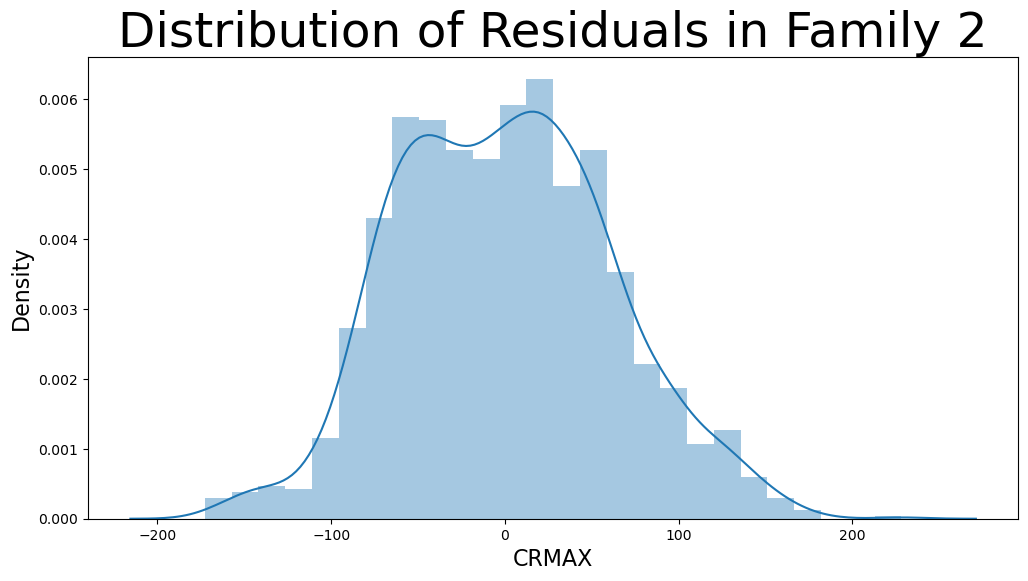

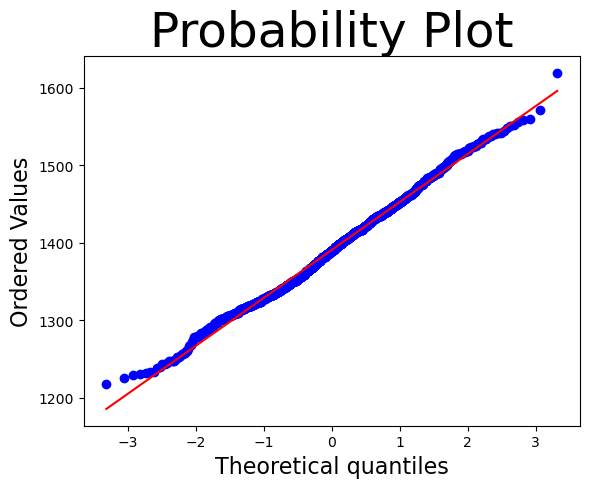

(6.71486122882925e-05, 'Residuals are not normally distributed', False)

In [17]:
CalcularNormalidadFamily(Family_2C,str(2))

Independencia

In [18]:
stat, p, dof, expected = chi2_contingency(Family_2C.CRMAX) 
alpha = 0.05
Message=''
if p <= alpha: 
    Message= 'Dependent(reject H0)'
else: 
    Message= 'Independent(H0 holds true)'
print(p)
print(Message)

1.0
Independent(H0 holds true)


Homocedasticidad

In [19]:
stat, p=levene(Family_2.CRMAX, Family_2D.CRMAX)
alpha = 0.05
print(p)
Message=''
if p <= alpha: 
    Message= 'No Homocedasticos'
else: 
    Message= 'Homocedasticos'
print(Message)

0.08689884790519248
Homocedasticos


prueba Mann-Whitney

In [20]:
stat, p = mannwhitneyu(Family_2.CRMAX, Family_2D.CRMAX,alternative='two-sided')
print(p)
# interpretación
alpha = 0.05
if p > alpha:
	print('No rechazamos H0: No hay diferencias significativas')
else:
	print('Rechazamos H0: Hay diferencias significativas')

0.0003134096378837402
Rechazamos H0: Hay diferencias significativas


Prueba t

In [21]:
v,p=stats.ttest_ind(Family_2.CRMAX,Family_2D.CRMAX, equal_var = True)
# interpretación
alpha = 0.05
print(p)
if p > alpha:
	print('No rechazamos H0: No hay diferencias significativas')
else:
	print('Rechazamos H0: Hay diferencias significativas')


2.30814511894867e-06
Rechazamos H0: Hay diferencias significativas


Box plot per instance

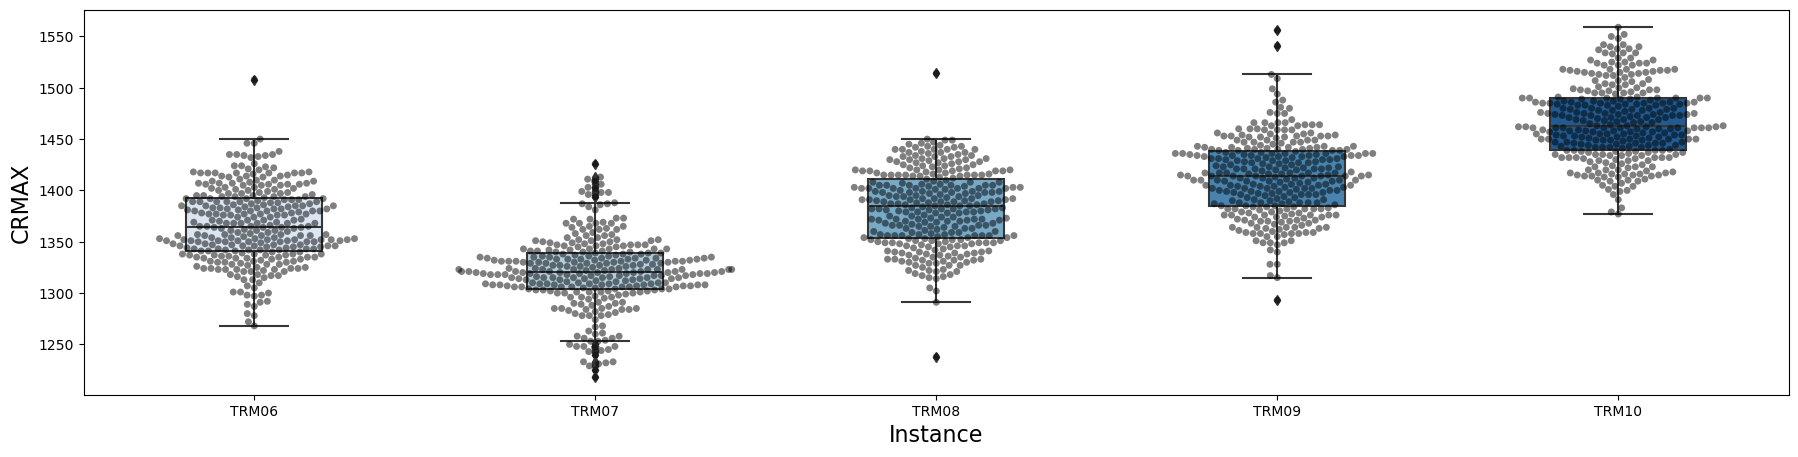

In [22]:
plt.figure(figsize=(22,5))
ax=sns.boxplot(x="Instance", y="CRMAX", data=Family_2, width=0.4,palette="Blues")

sns.swarmplot(x="Instance", y="CRMAX", data=Family_2,  color='black',
              alpha = 0.5, ax=ax)

parameters = {'axes.labelsize': 16,
          'axes.titlesize': 35}
plt.rcParams.update(parameters)
plt.savefig("Family2.pdf",dpi=2000)

# Family 3

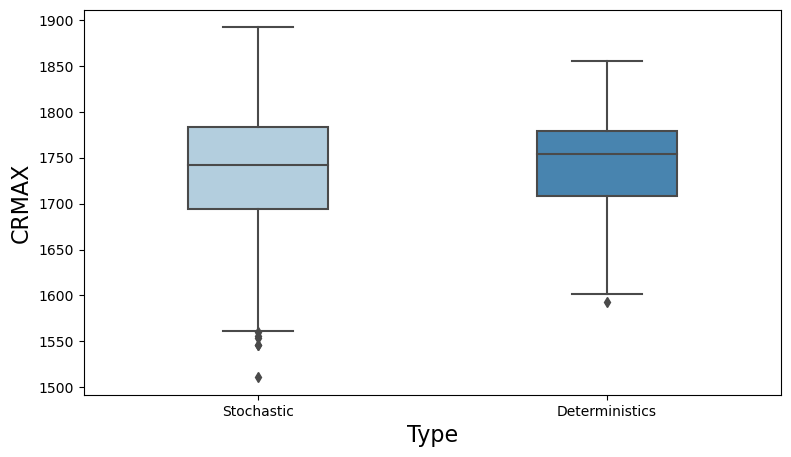

In [23]:
V=['TRM11','TRM12', 'TRM13', 'TRM14','TRM15']
Family_3 = df_melt[df_melt.Instance.isin(V)]
Family_3=Family_3.assign(Family=3)
Family_3C= Family_3.copy()
del Family_3C['index']
del Family_3C['Instance']
del Family_3C['Family']
Family_3C=Family_3C.assign(Type='Stochastic')
Family_3D=dfDeterministics[dfDeterministics.Instance.isin(V)]
del Family_3D['Instance']
Family_3D=Family_3D.assign(Type='Deterministics')
Family_3C=pd.concat([Family_3C, Family_3D])
plt.figure(figsize=(9,5))
ax=sns.boxplot(x="Type", y="CRMAX", data=Family_3C, width=0.4,palette="Blues")



parameters = {'axes.labelsize': 16,
          'axes.titlesize': 35}
plt.rcParams.update(parameters)
plt.savefig("Family3.pdf",dpi=2000)

Normalidad

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


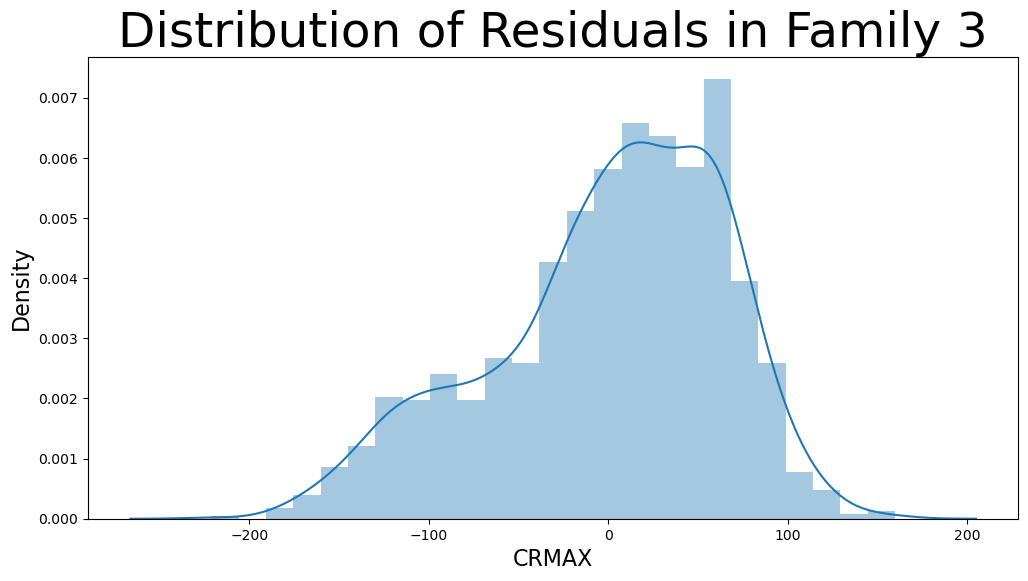

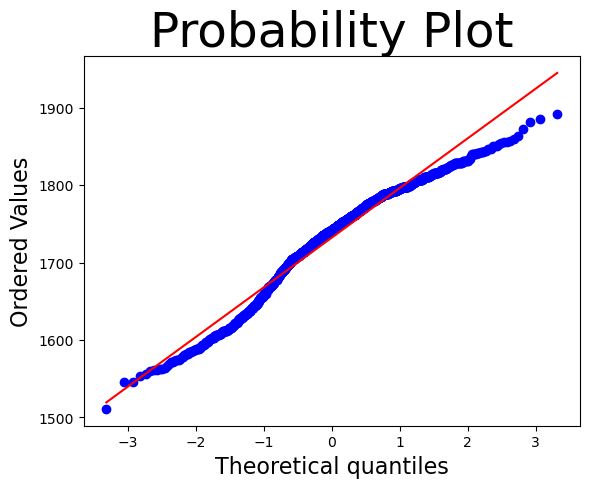

(2.8012266716906675e-18, 'Residuals are not normally distributed', False)

In [24]:
CalcularNormalidadFamily(Family_3C,str(3))

Independencia

In [25]:
stat, p, dof, expected = chi2_contingency(Family_3C.CRMAX) 
alpha = 0.05
Message=''
if p <= alpha: 
    Message= 'Dependent(reject H0)'
else: 
    Message= 'Independent(H0 holds true)'
print(p,Message)

1.0 Independent(H0 holds true)


Homocedasticidad

In [26]:
stat, p=levene(Family_3.CRMAX, Family_3D.CRMAX)
alpha = 0.05
print(p)
Message=''
if p <= alpha: 
    Message= 'No Homocedasticos'
else: 
    Message= 'Homocedasticos'
print(Message)

0.7125910732617777
Homocedasticos


Prueba Mann-Whitney

In [27]:
stat, p = mannwhitneyu(Family_3.CRMAX, Family_3D.CRMAX,alternative='two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpretación
alpha = 0.05
if p > alpha:
	print('No rechazamos H0: No hay diferencias significativas')
else:
	print('Rechazamos H0: Hay diferencias significativas')

Statistics=18483.500, p=0.903
No rechazamos H0: No hay diferencias significativas


Prueba t

In [28]:
v,p=stats.ttest_ind(Family_3.CRMAX,Family_3D.CRMAX, equal_var = True)
# interpretación
alpha = 0.05
print(p)
if p > alpha:
	print('No rechazamos H0: No hay diferencias significativas')
else:
	print('Rechazamos H0: Hay diferencias significativas')

0.8593443478166373
No rechazamos H0: No hay diferencias significativas


Box plot per instance

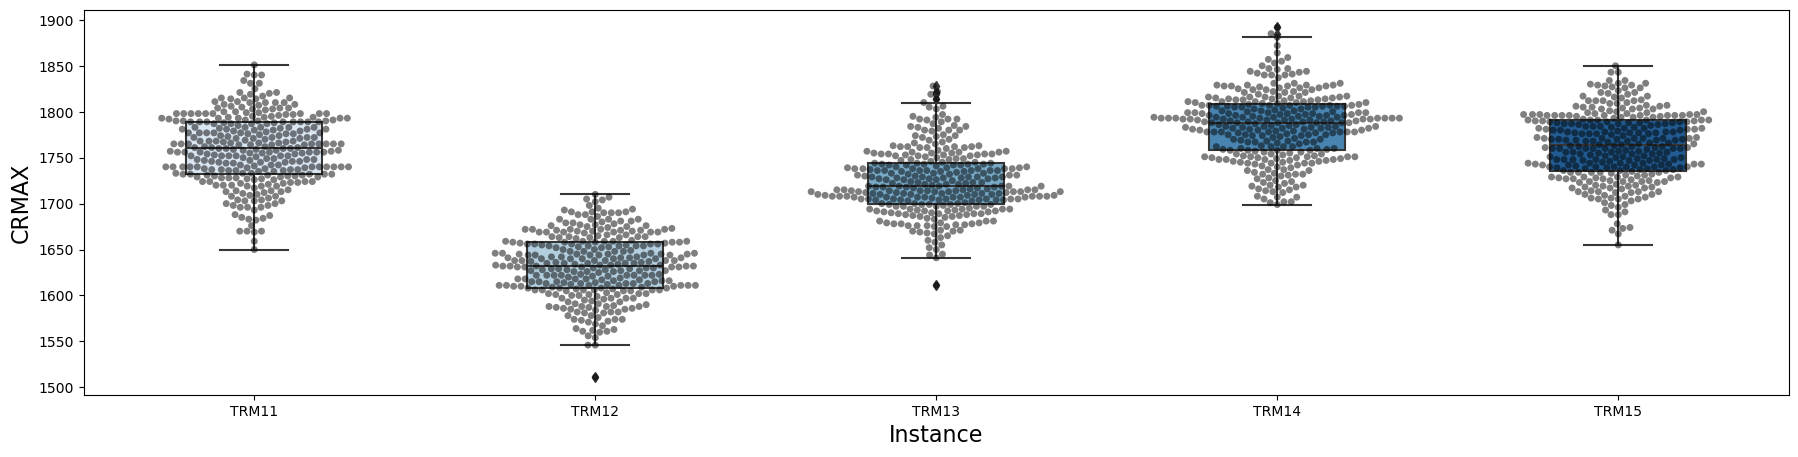

In [29]:
plt.figure(figsize=(22,5))
ax=sns.boxplot(x="Instance", y="CRMAX", data=Family_3, width=0.4,palette="Blues")

sns.swarmplot(x="Instance", y="CRMAX", data=Family_3,  color='black',
              alpha = 0.5, ax=ax)

parameters = {'axes.labelsize': 16,
          'axes.titlesize': 35}
plt.rcParams.update(parameters)
plt.savefig("Family4.pdf",dpi=2000)

# Family 4

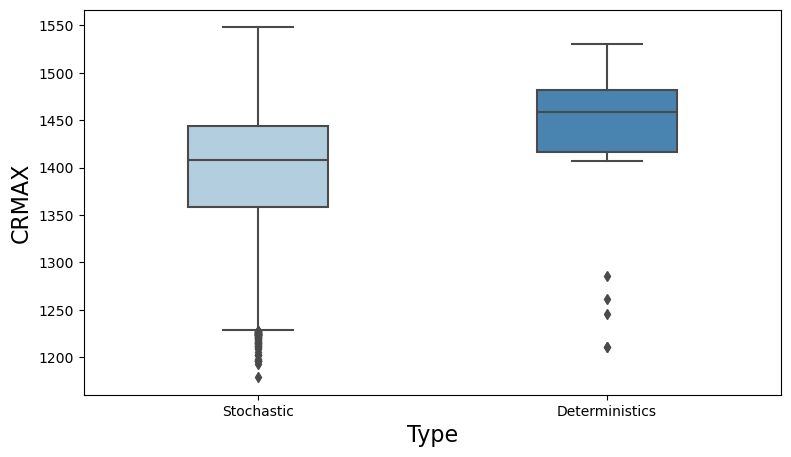

In [30]:
V=['TRM16','TRM17', 'TRM18', 'TRM19','TRM20']
Family_4 = df_melt[df_melt.Instance.isin(V)]
Family_4=Family_4.assign(Family=4)
Family_4C= Family_4.copy()
del Family_4C['index']
del Family_4C['Instance']
del Family_4C['Family']
Family_4C=Family_4C.assign(Type='Stochastic')
Family_4D=dfDeterministics[dfDeterministics.Instance.isin(V)]
del Family_4D['Instance']
Family_4D=Family_4D.assign(Type='Deterministics')
Family_4C=pd.concat([Family_4C, Family_4D])
plt.figure(figsize=(9,5))
ax=sns.boxplot(x="Type", y="CRMAX", data=Family_4C, width=0.4,palette="Blues")



parameters = {'axes.labelsize': 16,
          'axes.titlesize': 35}
plt.rcParams.update(parameters)
plt.savefig("Family3.pdf",dpi=2000)

Normalidad

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


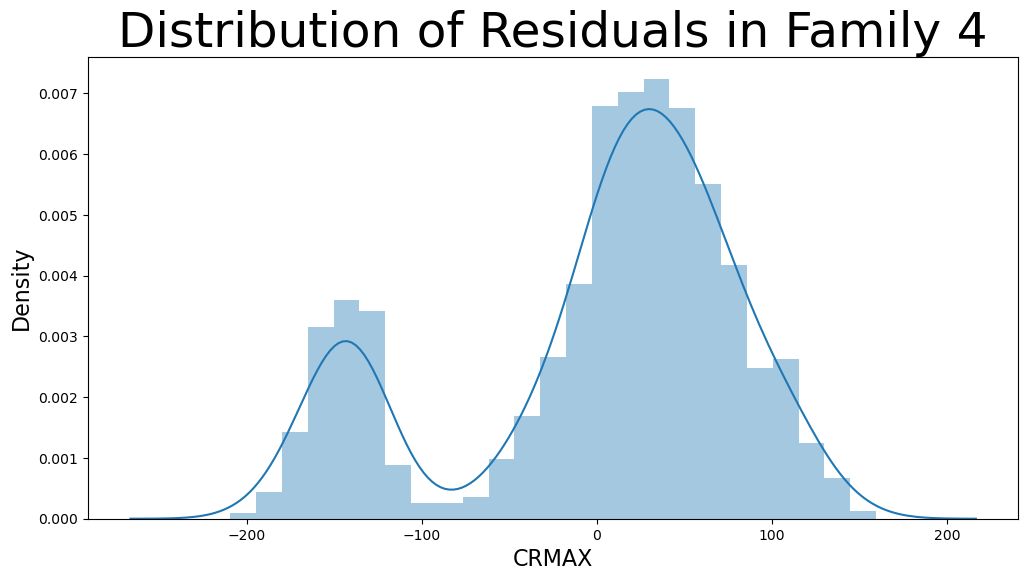

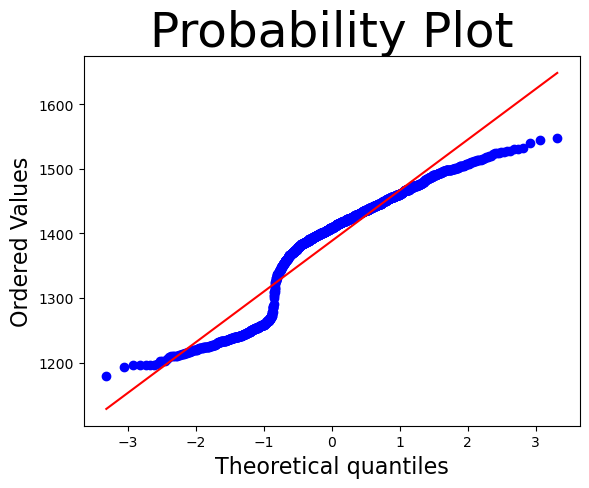

(7.407483916395959e-30, 'Residuals are not normally distributed', False)

In [31]:
CalcularNormalidadFamily(Family_4C,str(4))

Independencia

In [32]:
stat, p, dof, expected = chi2_contingency(Family_4C.CRMAX) 
alpha = 0.05
Message=''
if p <= alpha: 
    Message= 'Dependent(reject H0)'
else: 
    Message= 'Independent(H0 holds true)'
print(Message)

Independent(H0 holds true)


Homocedasticidad

In [33]:
stat, p=levene(Family_4.CRMAX, Family_4D.CRMAX)
print(p)
alpha = 0.05
Message=''
if p <= alpha: 
    Message= 'No Homocedasticos'
else: 
    Message= 'Homocedasticos'
print(Message)

0.6711611111070079
Homocedasticos


Prueba Mann-whitney

In [34]:
stat, p = mannwhitneyu(Family_4.CRMAX, Family_4D.CRMAX,alternative='two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpretación
alpha = 0.05
if p > alpha:
	print('No rechazamos H0: No hay diferencias significativas')
else:
	print('Rechazamos H0: Hay diferencias significativas')
print(p)

Statistics=12418.000, p=0.004
Rechazamos H0: Hay diferencias significativas
0.0037384457478831026


Prueba t

In [35]:
v,p=stats.ttest_ind(Family_4.CRMAX,Family_4D.CRMAX, equal_var = True)
# interpretación
alpha = 0.05
print(p)
if p > alpha:
	print('No rechazamos H0: No hay diferencias significativas')
else:
	print('Rechazamos H0: Hay diferencias significativas')

0.05224281292362011
No rechazamos H0: No hay diferencias significativas


Box plot per instance

C:\Users\PC\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


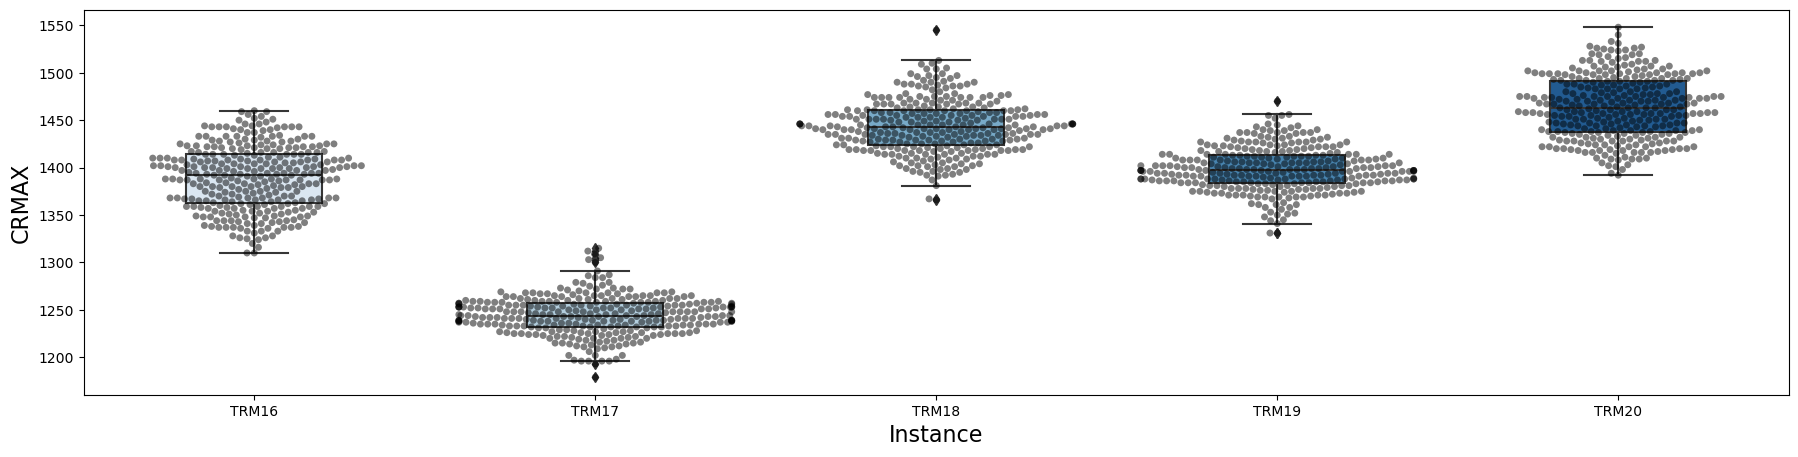

In [36]:
plt.figure(figsize=(22,5))
ax=sns.boxplot(x="Instance", y="CRMAX", data=Family_4, width=0.4,palette="Blues")

sns.swarmplot(x="Instance", y="CRMAX", data=Family_4,  color='black',
              alpha = 0.5, ax=ax)

parameters = {'axes.labelsize': 16,
          'axes.titlesize': 35}
plt.rcParams.update(parameters)
plt.savefig("Family4.pdf",dpi=2000)

# Family 5 

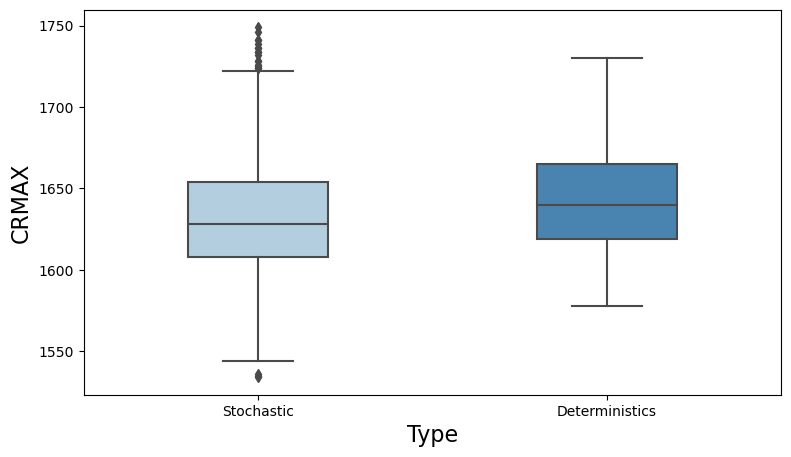

In [37]:
V=['TRM21','TRM22', 'TRM23', 'TRM24','TRM25']
Family_5 = df_melt[df_melt.Instance.isin(V)]
Family_5=Family_5.assign(Family=5)
Family_5C= Family_5.copy()
del Family_5C['index']
del Family_5C['Instance']
del Family_5C['Family']
Family_5C=Family_5C.assign(Type='Stochastic')
Family_5D=dfDeterministics[dfDeterministics.Instance.isin(V)]
del Family_5D['Instance']
Family_5D=Family_5D.assign(Type='Deterministics')
Family_5C=pd.concat([Family_5C, Family_5D])
plt.figure(figsize=(9,5))
ax=sns.boxplot(x="Type", y="CRMAX", data=Family_5C, width=0.4,palette="Blues")

parameters = {'axes.labelsize': 16,
          'axes.titlesize': 35}
plt.rcParams.update(parameters)
plt.savefig("BoxPlot2.pdf",dpi=2000)

Normalidad

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


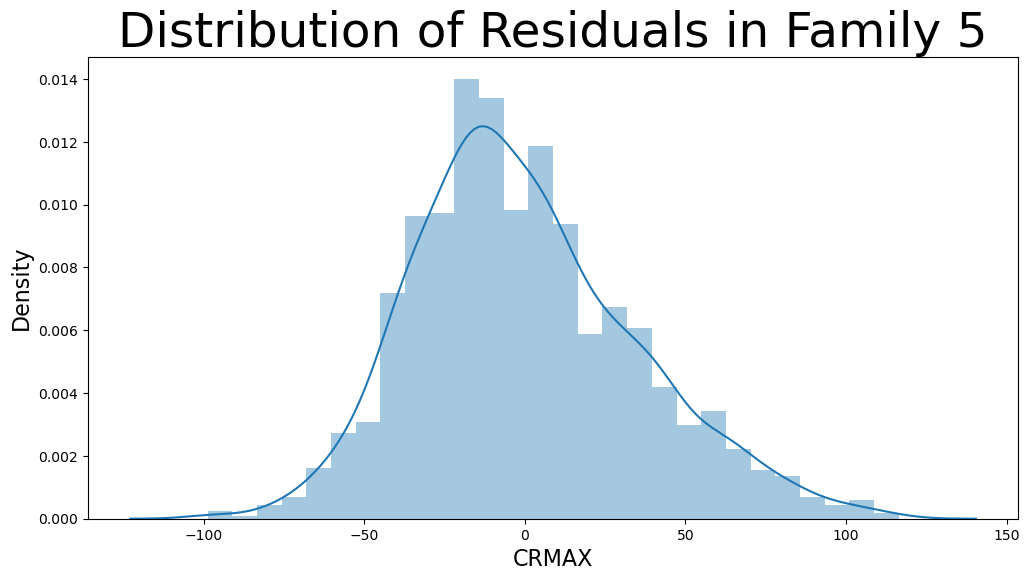

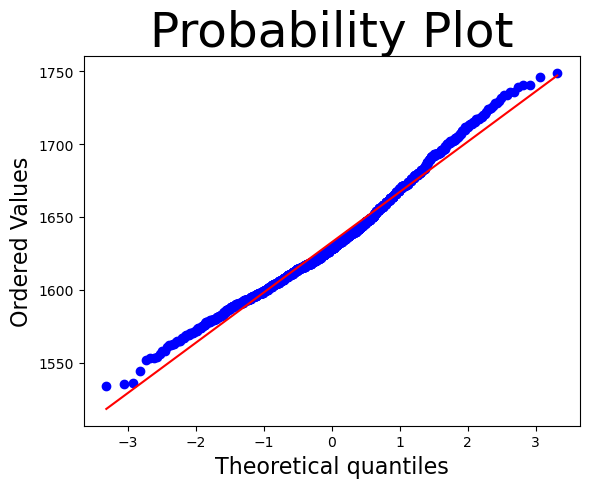

(2.628271949037253e-12, 'Residuals are not normally distributed', False)

In [38]:
CalcularNormalidadFamily(Family_5C,str(5))

Independencia

In [39]:
stat, p, dof, expected = chi2_contingency(Family_5C.CRMAX) 
alpha = 0.05
Message=''
if p <= alpha: 
    Message= 'Dependent(reject H0)'
else: 
    Message= 'Independent(H0 holds true)'
print(Message)

Independent(H0 holds true)


Homocedasticidad

In [40]:
stat, p=levene(Family_5.CRMAX, Family_5D.CRMAX)
alpha = 0.05
print(p)
Message=''
if p <= alpha: 
    Message= 'No Homocedasticos'
else: 
    Message= 'Homocedasticos'
print(Message)

0.7132217347151582
Homocedasticos


Prueba Mann-Whitney

In [41]:
stat, p = mannwhitneyu(Family_5.CRMAX, Family_5D.CRMAX,alternative='two-sided')
print(p)
# interpretación
alpha = 0.05
if p > alpha:
	print('No rechazamos H0: No hay diferencias significativas')
else:
	print('Rechazamos H0: Hay diferencias significativas')

0.07465468418170523
No rechazamos H0: No hay diferencias significativas


Prueba t

In [42]:
v,p=stats.ttest_ind(Family_5.CRMAX,Family_5D.CRMAX, equal_var = True)
# interpretación
alpha = 0.05
print(p)
if p > alpha:
	print('No rechazamos H0: No hay diferencias significativas')
else:
	print('Rechazamos H0: Hay diferencias significativas')

0.04726404564082532
Rechazamos H0: Hay diferencias significativas


Box plot per instance

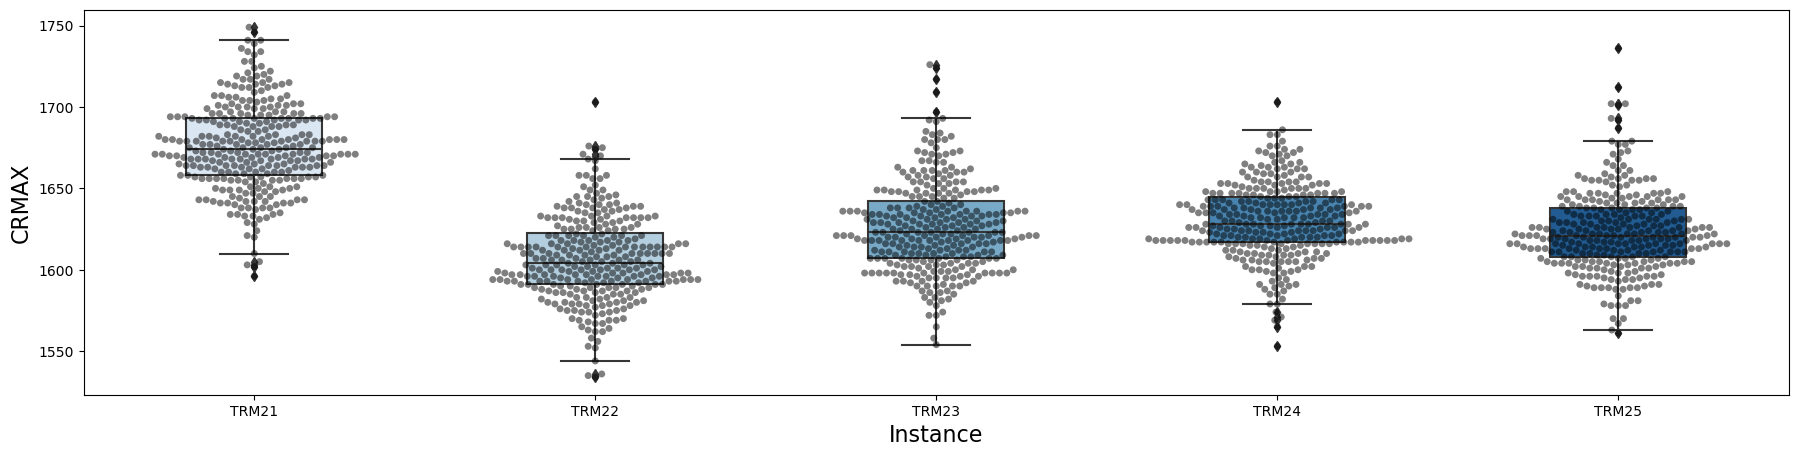

In [43]:
plt.figure(figsize=(22,5))
ax=sns.boxplot(x="Instance", y="CRMAX", data=Family_5, width=0.4,palette="Blues")

sns.swarmplot(x="Instance", y="CRMAX", data=Family_5,  color='black',
              alpha = 0.5, ax=ax)

parameters = {'axes.labelsize': 16,
          'axes.titlesize': 35}
plt.rcParams.update(parameters)

plt.savefig("Family6.pdf",dpi=2000)

# Family 6

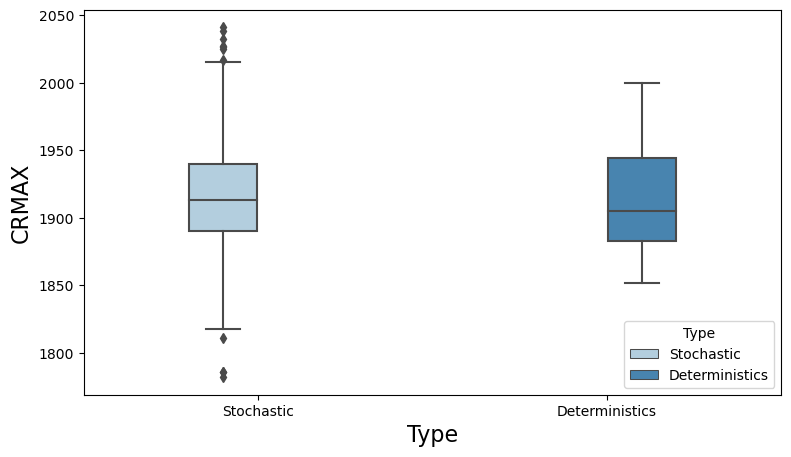

In [44]:
V=['TRM26','TRM27', 'TRM28', 'TRM29','TRM30']
Family_6 = df_melt[df_melt.Instance.isin(V)]
Family_6=Family_6.assign(Family=6)
Family_6C= Family_6.copy()
del Family_6C['index']
del Family_6C['Instance']
del Family_6C['Family']
Family_6C=Family_6C.assign(Type='Stochastic')
Family_6D=dfDeterministics[dfDeterministics.Instance.isin(V)]
del Family_6D['Instance']
Family_6D=Family_6D.assign(Type='Deterministics')
Family_6C=pd.concat([Family_6C, Family_6D])
plt.figure(figsize=(9,5))
ax=sns.boxplot(x="Type", y="CRMAX", data=Family_6C, width=0.4,palette="Blues",hue="Type")



parameters = {'axes.labelsize': 16,
          'axes.titlesize': 35}
plt.rcParams.update(parameters)

Normalidad

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


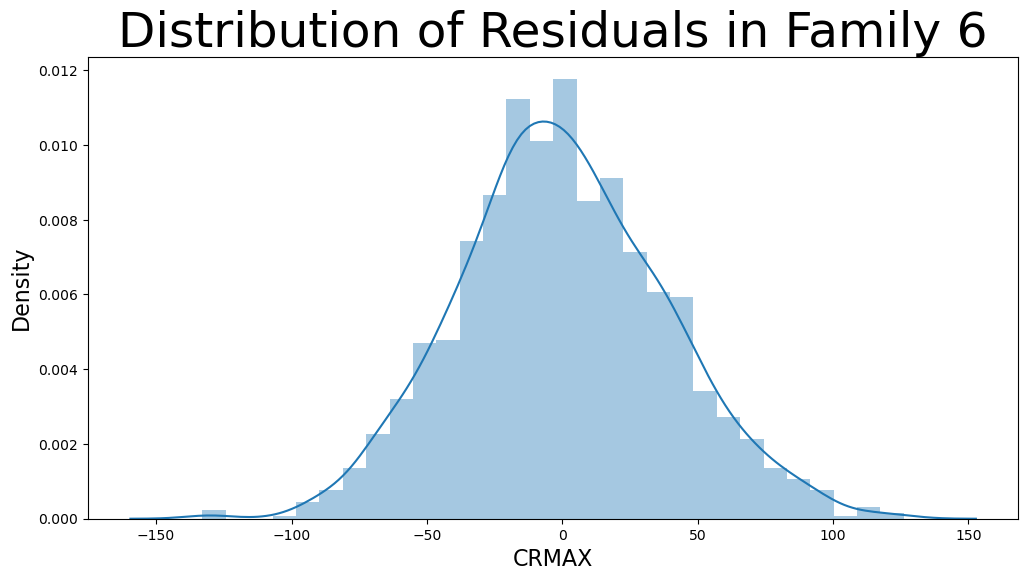

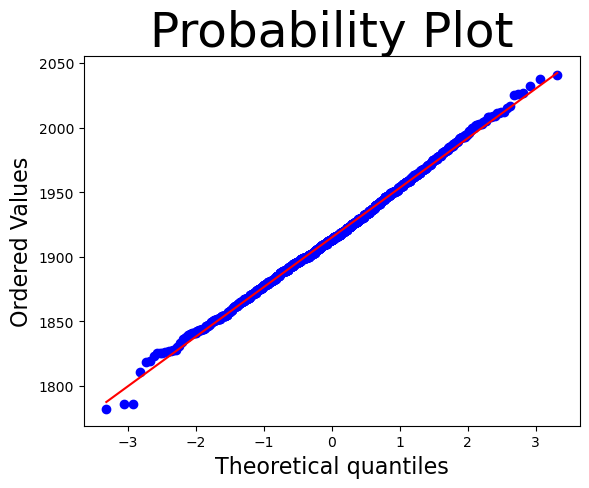

(0.050970468670129776, 'Residuals are normally distributed', True)

In [45]:
CalcularNormalidadFamily(Family_6C,str(6))

Homocedasticidad

In [46]:
stat, p=levene(Family_6.CRMAX, Family_6D.CRMAX)
alpha = 0.05
print(p)
Message=''
if p <= alpha: 
    Message= 'No Homocedasticos'
else: 
    Message= 'Homocedasticos'
print(Message)

0.932300652367899
Homocedasticos


Independencia

In [47]:
stat, p, dof, expected = chi2_contingency(Family_6C.CRMAX) 
alpha = 0.05
Message=''
if p <= alpha: 
    Message= 'Dependent(reject H0)'
else: 
    Message= 'Independent(H0 holds true)'
print(Message)

Independent(H0 holds true)


Prueba Mann-Whitney

In [48]:
stat, p = mannwhitneyu(Family_6.CRMAX, Family_6D.CRMAX,alternative='two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpretación
alpha = 0.05
if p > alpha:
	print('No rechazamos H0: No hay diferencias significativas')
else:
	print('Rechazamos H0: Hay diferencias significativas')

Statistics=19650.000, p=0.680
No rechazamos H0: No hay diferencias significativas


Prueba t

In [49]:
v,p=stats.ttest_ind(Family_6.CRMAX,Family_6D.CRMAX, equal_var = True)
# interpretación
alpha = 0.05
print(p)
if p > alpha:
	print('No rechazamos H0: No hay diferencias significativas')
else:
	print('Rechazamos H0: Hay diferencias significativas')

0.8875476321810711
No rechazamos H0: No hay diferencias significativas


Box Plot per intance

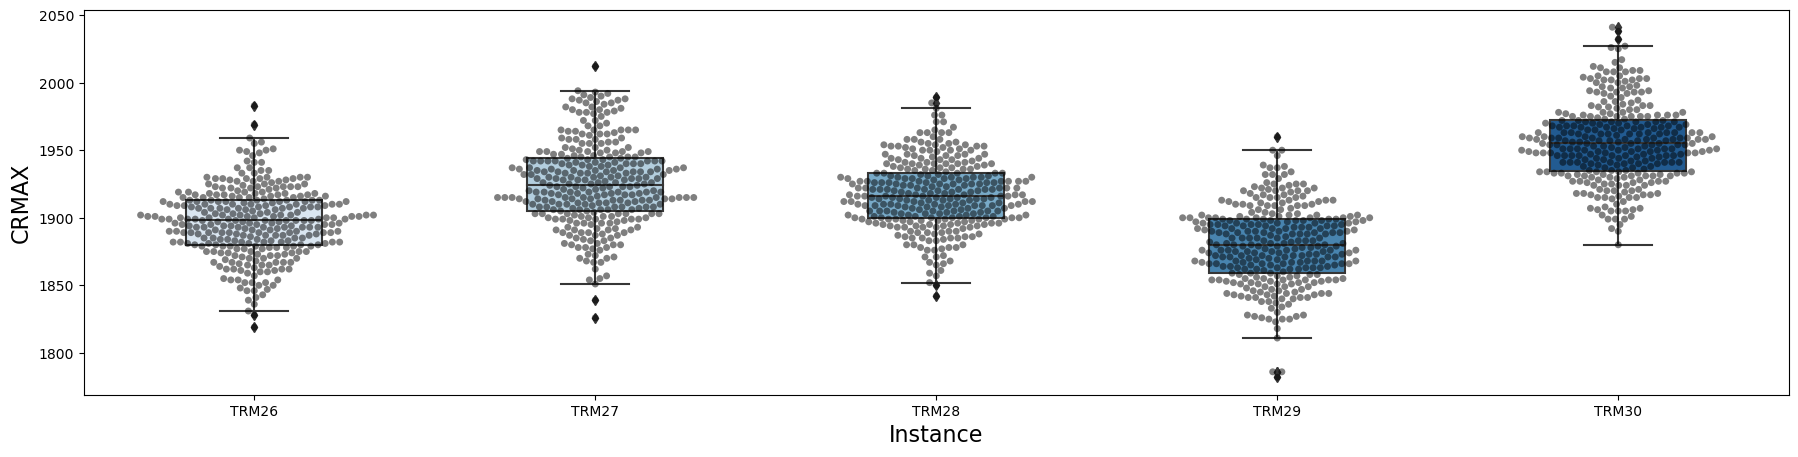

In [50]:
plt.figure(figsize=(22,5))
ax=sns.boxplot(x="Instance", y="CRMAX", data=Family_6, width=0.4,palette="Blues")

sns.swarmplot(x="Instance", y="CRMAX", data=Family_6,  color='black',
              alpha = 0.5, ax=ax)

parameters = {'axes.labelsize': 16,
          'axes.titlesize': 35}
plt.rcParams.update(parameters)

plt.savefig("Family6.pdf",dpi=2000)

# Join

In [51]:
df_JOIN= pd.concat([Family_1,Family_2, Family_3, Family_4, Family_5, Family_6])

In [52]:
df_JOIN.tail()

,index,Instance,CRMAX,Family
8995,295,TRM30,1953,6
8996,296,TRM30,2000,6
8997,297,TRM30,1966,6
8998,298,TRM30,1949,6
8999,299,TRM30,2003,6


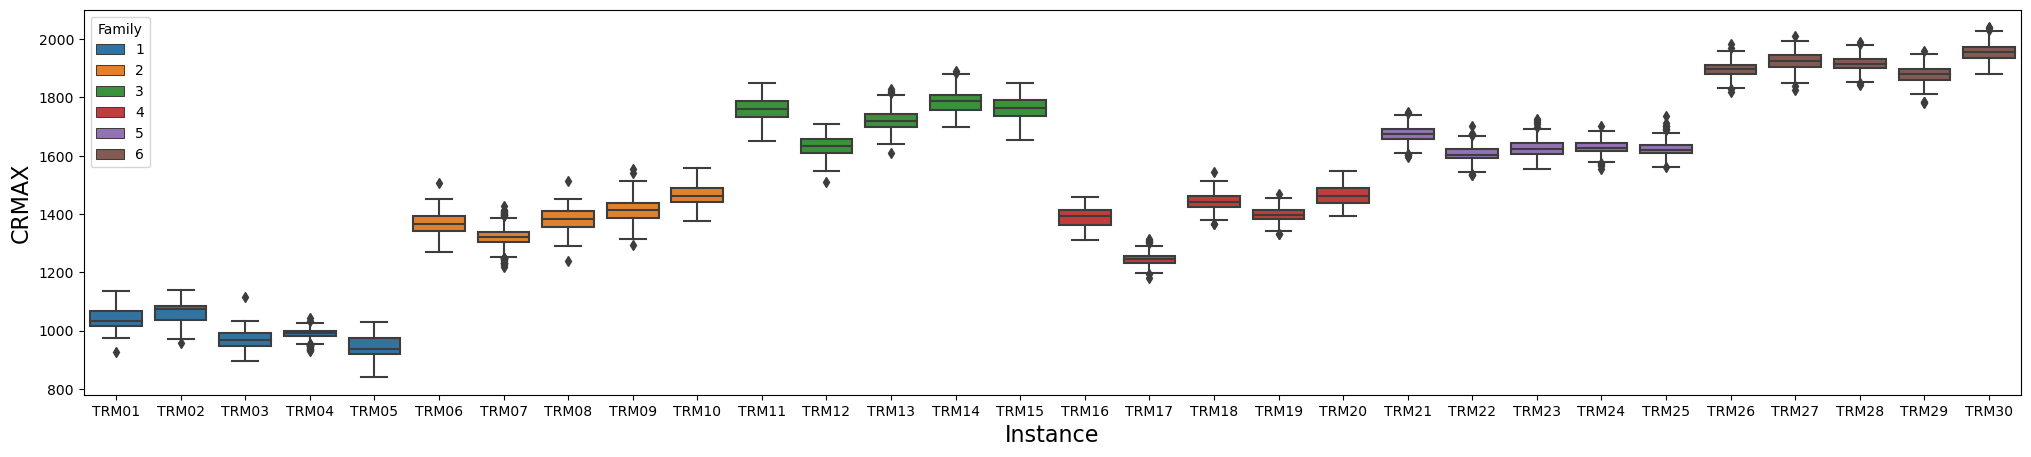

In [53]:
plt.figure(figsize=(25,5))
ax = sns.boxplot(x="Instance", y="CRMAX", hue="Family",
                 data=df_JOIN, dodge=False)
plt.savefig("BoxplorAllInstances.pdf",dpi=2000)

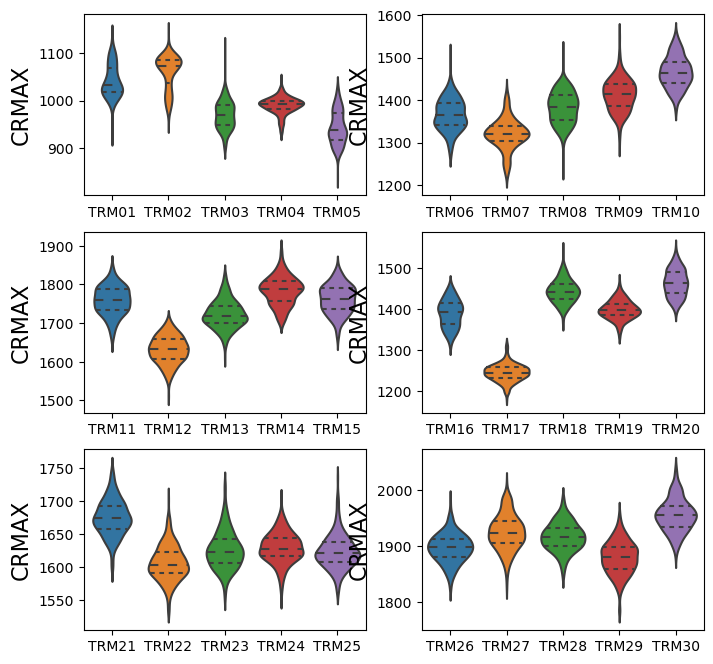

In [56]:
fig, ax = plt.subplots(3,2)
fig.set_size_inches(8,8)
#ax[0,0].set_title('Family 1', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold'})
#ax[0,1].set_title('Family 2', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold'})
#ax[1,0].set_title('Family 3', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold'})
#ax[1,1].set_title('Family 4', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold'})
#ax[2,0].set_title('Family 5', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold'})
#ax[2,1].set_title('Family 6', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold'})
sns.violinplot(x="Instance", y="CRMAX", data=Family_1, kind = "violin", inner = "quartile", ax = ax[0, 0]);
sns.violinplot(x="Instance", y="CRMAX", data=Family_2, kind = "violin", inner = "quartile", ax = ax[0, 1]);
sns.violinplot(x="Instance", y="CRMAX", data=Family_3, kind = "violin", inner = "quartile", ax = ax[1, 0]);
sns.violinplot(x="Instance", y="CRMAX", data=Family_4, kind = "violin", inner = "quartile", ax = ax[1, 1]);
sns.violinplot(x="Instance", y="CRMAX", data=Family_5, kind = "violin", inner = "quartile", ax = ax[2, 0]);
sns.violinplot(x="Instance", y="CRMAX", data=Family_6, kind = "violin", inner = "quartile", ax = ax[2, 1]);
ax[0,0].set_xlabel("",fontdict = {'fontsize':13})
ax[0,1].set_xlabel("",fontdict = {'fontsize':13})
ax[1,0].set_xlabel("",fontdict = {'fontsize':13})
ax[1,1].set_xlabel("",fontdict = {'fontsize':13})
ax[2,0].set_xlabel("",fontdict = {'fontsize':13})
ax[2,1].set_xlabel("",fontdict = {'fontsize':13})

plt.rcParams.update(parameters)
plt.savefig("Guitarras.pdf",dpi=2000)

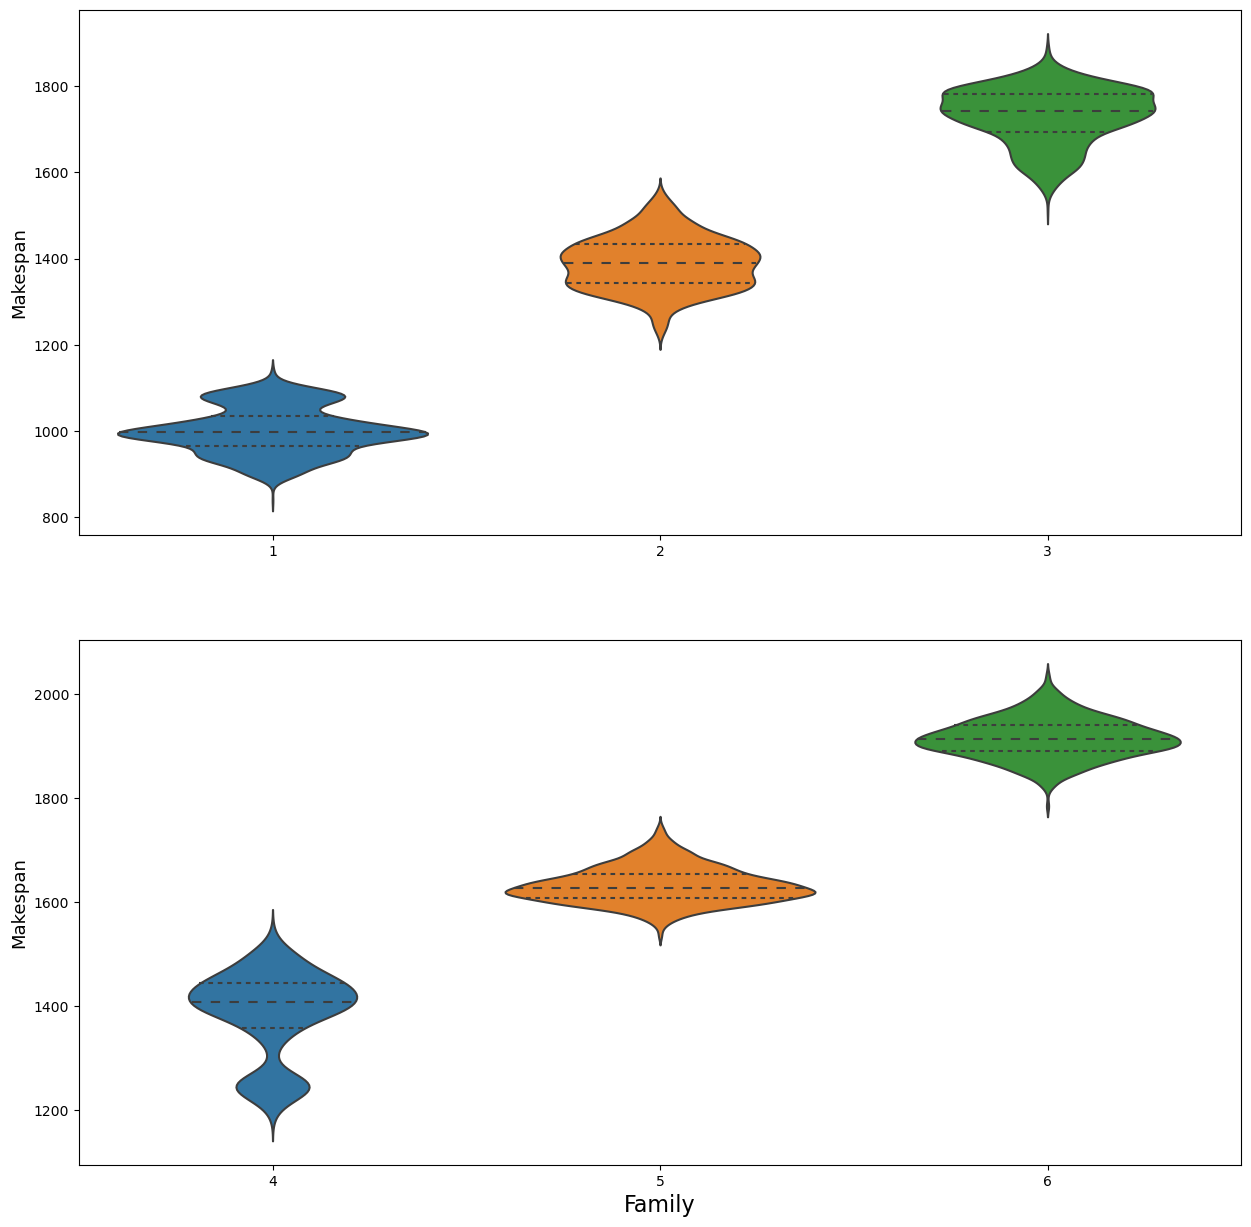

In [57]:

F1= pd.concat([Family_1,Family_2, Family_3])
F2= pd.concat([Family_4,Family_5, Family_6])
fig, ax = plt.subplots(2)
fig.set_size_inches(8,8)
sns.violinplot(x="Family", y="CRMAX", data=F1, kind = "violin", inner = "quartile", ax=ax[0]);
sns.violinplot(x="Family", y="CRMAX", data=F2, kind = "violin", inner = "quartile", ax=ax[1]);
ax[0].set_ylabel("Makespan",fontdict = {'fontsize':13})
ax[0].set_xlabel("",fontdict = {'fontsize':13})
ax[1].set_ylabel("Makespan",fontdict = {'fontsize':13})
plt.savefig("Guitarrasbyfamily.pdf",dpi=2000)

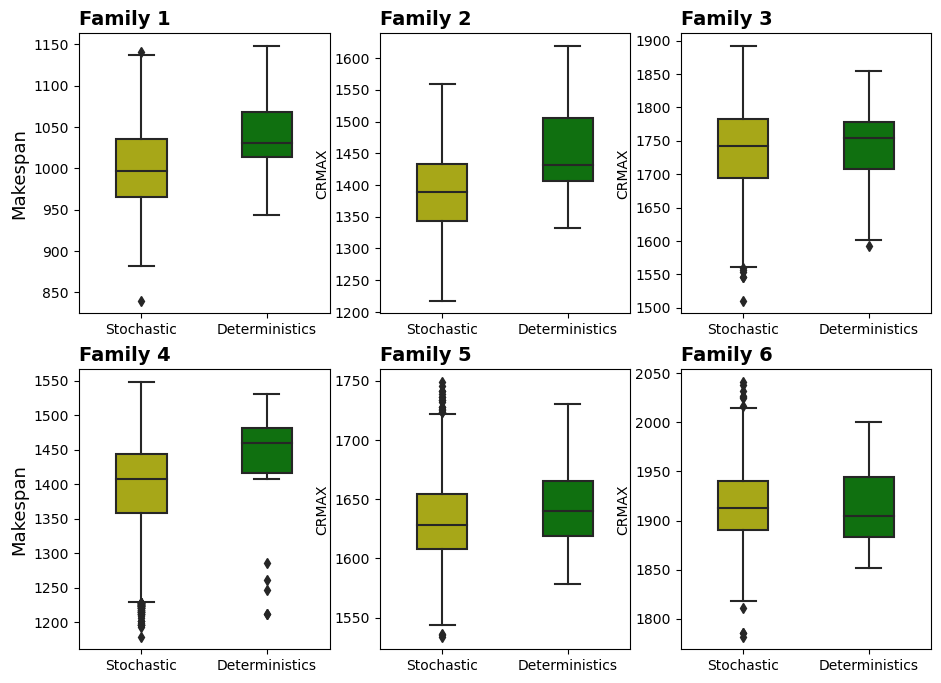

In [63]:
fig, ax = plt.subplots(2,3)
fig.set_size_inches(11,8)
#sns.set(style="darkgrid")
my_pal = {"Deterministics": "g", "setosa": "b", "Stochastic":"y"}

sns.boxplot(x="Type", y="CRMAX", data=Family_1C, width=0.4, ax=ax[0,0],  palette=my_pal)
sns.boxplot(x="Type", y="CRMAX", data=Family_2C, width=0.4, ax=ax[0,1],  palette=my_pal)
sns.boxplot(x="Type", y="CRMAX", data=Family_3C, width=0.4, ax=ax[0,2],  palette=my_pal)
sns.boxplot(x="Type", y="CRMAX", data=Family_4C, width=0.4, ax=ax[1,0],  palette=my_pal)
sns.boxplot(x="Type", y="CRMAX", data=Family_5C, width=0.4, ax=ax[1,1],  palette=my_pal)
sns.boxplot(x="Type", y="CRMAX", data=Family_6C, width=0.4, ax=ax[1,2],  palette=my_pal)
ax[0,0].set_xlabel("",fontdict = {'fontsize':13})
ax[0,1].set_xlabel("",fontdict = {'fontsize':13})
ax[0,2].set_xlabel("",fontdict = {'fontsize':13})
ax[1,0].set_xlabel("",fontdict = {'fontsize':13})
ax[1,1].set_xlabel("",fontdict = {'fontsize':13})
ax[1,2].set_xlabel("",fontdict = {'fontsize':13})


ax[0,0].set_title('Family 1', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold'})
ax[0,1].set_title('Family 2', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold'})
ax[0,2].set_title('Family 3', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold'})
ax[1,0].set_title('Family 4', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold'})
ax[1,1].set_title('Family 5', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold'})
ax[1,2].set_title('Family 6', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold'})
ax[0,0].set_ylabel("Makespan",fontdict = {'fontsize':13})
#ax[0,1].set_ylabel("Makespan",fontdict = {'fontsize':13})
#ax[0,2].set_ylabel("Makespan",fontdict = {'fontsize':13})
ax[1,0].set_ylabel("Makespan",fontdict = {'fontsize':13})
#ax[1,1].set_ylabel("Makespan",fontdict = {'fontsize':13})
#ax[1,2].set_ylabel("Makespan",fontdict = {'fontsize':13})
#ax[1,1].set_ylabel("",fontdict = {'fontsize':13})
#ax[2,1].set_ylabel("",fontdict = {'fontsize':13})

parameters = {'axes.labelsize': 10,
          'axes.titlesize': 15}
plt.rcParams.update(parameters)
plt.savefig("BoxPlotFamilies.pdf",dpi=2000)

# Instance

In [ ]:
def agregarDeterministico (pos):
    deterministic= dfDeterministics["CRMAX"]
    return deterministic[pos]

In [ ]:
def CalcularNormalidad(name_instance):
    instance = df_melt[df_melt.Instance.isin([name_instance])]
    mean=instance.CRMAX.mean() 
    res=instance.CRMAX - mean
    w, p= shapiro(res)
    Message =""
    Retorno= True
    if(p>0.05):
        Message= "Residuals are normally distributed"
    else:
        Message= "Residuals are not normally distributed"
        Retorno=False
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals in Instance:' + name_instance )
    sns.distplot(res)
    plt.show()   
    QQ(name_instance)
    return (p,Message, Retorno)

In [ ]:
from scipy.stats import chi2_contingency 
def CalcularIndependency(name_instance):
    RetornoNormal=CalcularNormalidad(name_instance)[2]
    data = df_melt[df_melt.Instance.isin([name_instance])]["CRMAX"]
    stat, p, dof, expected = chi2_contingency(data) 
    alpha = 0.05
    Message=''
    if p <= alpha: 
        Message= 'Dependent(reject H0)'
    else: 
        Message= 'Independent(H0 holds true)'
    return p

In [ ]:
def Histogram(name_instance):
    instance = df_melt[df_melt.Instance.isin([name_instance])]
    plt.hist(instance["CRMAX"],edgecolor='black', linewidth=1)

In [ ]:
def QQ(name_instance):
    instance = df_melt[df_melt.Instance.isin([name_instance])]
    st.probplot(instance["CRMAX"], dist="norm", plot=pylab)
    pylab.show()

In [ ]:
def probabilidad (name_instance):
    instanceDeterministic = dfDeterministics[dfDeterministics.Instance.isin([name_instance])]
    instanceAux = df_melt[df_melt.Instance.isin([name_instance])]
    instance=instanceAux.set_index('index', drop= True)
    instanceDeterministic = dfDeterministics[dfDeterministics.Instance.isin([name_instance])]
    instanceDeterministic
    minDeterministic=instanceDeterministic['CRMAX'].min()
    contador=0
    for i in range(300):
        valor=instance["CRMAX"][i]
        if(valor< minDeterministic):
            contador=contador+1
    print(contador)
    return contador/300

In [ ]:
import statsmodels.api as sm
from scipy.stats import norm
def CalcularNormalidad2(name_instance):
    instance = df_melt[df_melt.Instance.isin([name_instance])]
    loc, scale = norm.fit(instance["CRMAX"])
    n = norm(loc=loc, scale=scale)
    w, p= sm.stats.lilliefors(instance["CRMAX"])
    Message =""
    if(p>0.05):
        Message= "Se comportan de manera normal"
    else:
        Message= "No se comportan de manera normal"
    return (p,Message)

In [ ]:
def CalcularHomocedasticidad(name_instance):
    instance = df_melt[df_melt.Instance.isin([name_instance])]
    instance2= dfDeterministics[dfDeterministics.Instance.isin([name_instance])]
    print(instance2)
    #print(instance.CRMAX)
    stat, p=levene(instance.CRMAX,instance2.CRMAX)
    alpha = 0.05
    print(p)
    Message=''
    if p <= alpha: 
        Message= 'No Homocedasticos'
    else: 
        Message= 'Homocedasticos'
    return (p,Message)

In [ ]:
dfDeterministics

In [ ]:
def meanInstance(name_instance):
    instance = df_melt[df_melt.Instance.isin([name_instance])]
    media= instance['CRMAX'].mean()
    minimo= instance['CRMAX'].min()
    maximo= instance['CRMAX'].max()
    Std= instance['CRMAX'].std()
    a=st.t.interval (alpha = 0.95, df = len (instance) -1, loc = np.mean (instance['CRMAX']), scale = st.sem (instance['CRMAX']))
    return (minimo,media,maximo,Std,a)

    

In [ ]:
def ttest(name_instance):
    deterministic= dfDeterministics[dfDeterministics.Instance.isin([name_instance])]
    
    print(deterministic)
    data = df_melt[df_melt.Instance.isin([name_instance])]["CRMAX"]
    w, p=st.ttest_1samp(a=data,popmean= deterministic["CRMAX"].mean())
    Message =""
    if(p>0.05):
        Message= "HO equal true"
    else:
        Message= "H1 equal false"
    return p
    

In [ ]:
deterministic= dfDeterministics[dfDeterministics.Instance.isin(['TRM01'])]
deterministic["CRMAX"].min()

In [ ]:
def mannWith(Family,FamilyD):
    stat, p = mannwhitneyu(Family.CRMAX, FamilyD.CRMAX.mean(),alternative='two-sided')
    # interpretación
    print(p)
    alpha = 0.05
    if p > alpha:
        print('No rechazamos H0: No hay diferencias significativas')
    else:
        print('Rechazamos H0: Hay diferencias significativas')
    return p

df_melt

In [ ]:
def tpareada(Family,FamilyD):
    stat, p, b=ttest_ind(Family.CRMAX,FamilyD.CRMAX)
    # interpretación
    alpha = 0.05
    print(p)
    if p > alpha:
        print('No rechazamos H0: No hay diferencias significativas')
    else:
        print('Rechazamos H0: Hay diferencias significativas')
    return p

In [ ]:
f=dfDeterministics[dfDeterministics.Instance.isin(['TRM01'])]
f.CRMAX.min()

In [ ]:
Lista=["TRM01", "TRM02", "TRM03", "TRM04", "TRM05", "TRM06", "TRM07", "TRM08", "TRM09" , "TRM10",
       "TRM11", "TRM12", "TRM13", "TRM14", "TRM15", "TRM16", "TRM17", "TRM18", "TRM19" , "TRM20",
       "TRM21", "TRM22", "TRM23", "TRM24", "TRM25", "TRM26", "TRM27", "TRM28", "TRM29" , "TRM30",
      ]
Deterministic=[]
Results=[]
Deterministic=[]
Results2=[]
Results3=[]
Results4=[]
Results5=[]
Results6=[]
Results7=[]
Results8=[]
Shapiro=[]
Levene=[]
Probability=[]
Independency=[]
contador=0
mmanw=[]
ttp=[]
for Instance in Lista:
    Deterministic.append(agregarDeterministico(contador))
    Results3.append(meanInstance(Instance)[0])
    Results4.append(meanInstance(Instance)[1])
    Results5.append(meanInstance(Instance)[2])
    Results6.append(meanInstance(Instance)[3])
    Results7.append(meanInstance(Instance)[4][0])
    Results8.append(meanInstance(Instance)[4][1])
    Shapiro.append(CalcularNormalidad(Instance)[0])
    Levene.append(CalcularHomocedasticidad(Instance)[0])
    Independency.append(1)
    Probability.append(probabilidad(Instance))
    prob=tpareada(df_melt[df_melt.Instance.isin([Instance])],dfDeterministics[dfDeterministics.Instance.isin([Instance])])
    if(prob<0.05):
        ttp.append(str(prob))
    else:
        ttp.append(str(prob))
        
    pro=mannWith(df_melt[df_melt.Instance.isin([Instance])],dfDeterministics[dfDeterministics.Instance.isin([Instance])])
    if(pro<0.05):
        mmanw.append(str(pro))
    else:
        mmanw.append(str(pro))
    
    contador=contador+1
Df_Results=pd.DataFrame([Lista,Deterministic,Probability,Results3,Results4,Results5, Results6, Results7, Results8,Shapiro,Levene,Independency,ttp,mmanw], index=["Instance" ,"Deterministic","Probability","Min", "Mean", "Max", "St. dev", "LL", "LU", "Normality", "Homocedasticidad","Independency", "t.test", "M.test"]).transpose()
Df_Results.set_index("Instance")

In [ ]:
Df_Results

In [ ]:
Df_Results.to_csv('Final.csv')


In [ ]:
fig, ax= plt.subplots(1, 1)
intervalos = [0, 0.2,  0.4, 0.6,  0.8,  1] #calculamos los extremos de los intervalos

plt.hist(x=Probability, bins=intervalos, color='#000080', rwidth=0.85)
plt.xlabel('$P_{threshold}$')
plt.ylabel('Frequency')
plt.savefig("Frecuency.pdf",dpi=2000)
plt.xticks(intervalos)

In [ ]:
mmanw

# Analisis de resultados

In [ ]:
def meanFamily(name_instance, column, DF):
    instance = DF[DF.Instance.isin(name_instance)]
    media= instance[column].mean()
    return media

In [ ]:
def meanFamily2(name_instance):
    instance = df_melt[df_melt.Instance.isin(name_instance)]
    Std= instance['CRMAX'].mean()
    return Std

In [ ]:
def stdFamily(name_instance):
    instance = df_melt[df_melt.Instance.isin(name_instance)]
    Std= instance['CRMAX'].std()
    return Std

In [ ]:
def minFamily(name_instance):
    instance = df_melt[df_melt.Instance.isin(name_instance)]
    Min= instance['CRMAX'].min()
    return Min

In [ ]:
def maxFamily(name_instance):
    instance = df_melt[df_melt.Instance.isin(name_instance)]
    Max= instance['CRMAX'].max()
    return Max

In [ ]:
from scipy.stats import sem
def error(name_instance, column, DF):
    instance = DF[DF.Instance.isin(name_instance)]
    media= sem(instance[column])
    return media

In [ ]:
Total=[["TRM01", "TRM02", "TRM03", "TRM04", "TRM05"],
["TRM06", "TRM07", "TRM08", "TRM09" , "TRM10"],
["TRM11", "TRM12", "TRM13", "TRM14", "TRM15"],
["TRM16", "TRM17", "TRM18", "TRM19" , "TRM20"],
["TRM21", "TRM22", "TRM23", "TRM24", "TRM25"],
["TRM26", "TRM27", "TRM28", "TRM29" , "TRM30"]]

Machines=[5,5,5,10,10,10]
Orders=[10,15,20,10,15,20]
Deterministic= []
Error= []
Probability=[]
Min=[]
Max=[]
Mean=[]
std=[]
mmanw=[]
tpa=[]
Std=[]
mmanw.append(mannWith(Family_1,Family_1D))
mmanw.append(mannWith(Family_2,Family_2D))
mmanw.append(mannWith(Family_3,Family_3D))
mmanw.append(mannWith(Family_4,Family_4D))
mmanw.append(mannWith(Family_5,Family_5D))
mmanw.append(mannWith(Family_6,Family_6D))

tpa.append(tpareada(Family_1,Family_1D))
tpa.append(tpareada(Family_2,Family_2D))
tpa.append(tpareada(Family_3,Family_3D))
tpa.append(tpareada(Family_4,Family_4D))
tpa.append(tpareada(Family_5,Family_5D))
tpa.append(tpareada(Family_6,Family_6D))
for i in range(len(Total)):
    Family= Total[i]
    DF=Df_Results[Df_Results.Instance.isin(Family)]
    Deterministic.append(meanFamily(Family,"Deterministic",DF))
    Error.append(error(Family,"Deterministic",DF))
    Probability.append(meanFamily(Family,"Probability",DF))
    Min.append(minFamily(Family))
    Max.append(maxFamily(Family))
    Mean.append(meanFamily2(Family))
    Std.append(stdFamily(Family))
DFamily =pd.DataFrame([Machines,Orders,Deterministic,Std,Probability,Min,Mean,Max,mmanw,tpa], 
                                  index=["Machines","Orders","Deterministic","Std","Probability", "Min","Mean" ,"Max", "p-m", "p-t"]).transpose()

In [ ]:
DFamily

In [ ]:
DFamily.to_csv('FinalFamily.csv')

In [ ]:
DFamily1=DFamily[DFamily.Machines.isin([5])]
DFamily2=DFamily[DFamily.Machines.isin([10])]
fig, (ax1, ax2)= plt.subplots(1, 2)
#ver https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
#https://aprendeconalf.es/docencia/python/manual/matplotlib/

ax1.plot(DFamily1["Orders"], DFamily1["Deterministic"],linewidth=4.2, marker = 'o')
ax1.plot(DFamily2["Orders"], DFamily1["Mean"],linewidth=4.2, marker = 'o')
ax1.plot(DFamily2["Orders"], DFamily1["Min"],linewidth=4.2, marker = 'o',linestyle = 'dotted')
ax1.plot(DFamily2["Orders"], DFamily1["Max"],linewidth=4.2, marker = 'o',linestyle = 'dotted')
ax2.plot(DFamily1["Orders"], DFamily2["Deterministic"],linewidth=4.2, marker = 'o')
ax2.plot(DFamily2["Orders"], DFamily2["Mean"],linewidth=4.2, marker = 'o')
ax2.plot(DFamily2["Orders"], DFamily2["Min"],linewidth=4.2, marker = 'o', linestyle = 'dotted')
ax2.plot(DFamily2["Orders"], DFamily2["Max"],linewidth=4.2, marker = 'o',linestyle = 'dotted')
plt.legend(['Deterministic','Stochastic','Min','Max'],bbox_to_anchor=(1.0, 0.5), loc=3,fontsize=12)
fig.set_figheight(7)
fig.set_figwidth(10)
ax1.set_xlabel("$Orders$",fontdict = {'fontsize':13})
ax2.set_xlabel("$Orders$",fontdict = {'fontsize':13})
ax1.set_xticks([10,15,20])
ax2.set_xticks([10,15,20])
ax1.set_ylabel("$CR_{MAX}$",fontdict = {'fontsize':13})
ax1.set_title(' Five machines', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold'})
ax2.set_title('Ten machines', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold'})
plt.savefig("ComparisonStochasticDeterministic.pdf",dpi=2000, bbox_inches='tight')
plt.show()


In [ ]:
DFamily1=DFamily[DFamily.Machines.isin([5])]
DFamily2=DFamily[DFamily.Machines.isin([10])]
#fig, ax = plt.subplots(2) ver https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
#https://aprendeconalf.es/docencia/python/manual/matplotlib/
fig, ax= plt.subplots()
ax.errorbar(DFamily1["Orders"], DFamily1["Deterministic"],linewidth=2.8, marker = 'o',yerr=DFamily1["Std"],linestyle = 'dotted')
ax.errorbar(DFamily1["Orders"], DFamily2["Deterministic"],linewidth=2.8, marker = 'o',yerr=DFamily2["Std"],linestyle = 'dotted')
lg=plt.legend(['Five machines','Ten machines'],bbox_to_anchor=(1, 0.5), loc=5,fontsize=12)
plt.savefig("High resoltion.pdf",dpi=2000)
fig.set_figheight(12)
fig.set_figwidth(12)
ax.set_xlabel("$Orders$",fontdict = {'fontsize':13})
ax.set_xticks([10,15,20])
ax.set_ylabel("$CR_{MAX}$",fontdict = {'fontsize':13})
plt.savefig("Comparison5and10machines.pdf",dpi=2000)
plt.show()


In [ ]:
DFamily1=DFamily[DFamily.Machines.isin([5])]
DFamily2=DFamily[DFamily.Machines.isin([10])]
fig, ax= plt.subplots()
ax.plot(DFamily1["Orders"], DFamily1["Probability"],linewidth=4, marker = 'o')
ax.plot(DFamily2["Orders"], DFamily2["Probability"],linewidth=4, marker = 'o')
lg=plt.legend(['Five machines','Ten machines'],bbox_to_anchor=(1, 0.5), loc=6,fontsize=12)
fig.set_figheight(6)
fig.set_figwidth(6)
ax.set_xlabel("Orders",fontdict = {'fontsize':13})
ax.set_xticks([10,15,20])
ax.set_ylabel("CRMAX",fontdict = {'fontsize':13})
plt.savefig("Probability.pdf",dpi=2000, bbox_inches='tight')
plt.show()


In [ ]:
DFamily1

In [ ]:
Family_2

In [ ]:
Instance="TRM06"
Family_2.isin([Instance])
Family_2
Family_2[Family_2.Instance.isin([Instance])]

In [ ]:
df_melt[df_melt.Instance.isin(['TRM06'])]

In [ ]:
Probability

In [ ]:
CalcularNormalidad("TRM01")[0]